In [3]:
from IPython.display import Image

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn import metrics

%matplotlib inline

In [6]:
path = 'Hitters.csv'
Hitters = pd.read_csv(path)

In [10]:
Hitters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
Unnamed: 0    322 non-null object
AtBat         322 non-null int64
Hits          322 non-null int64
HmRun         322 non-null int64
Runs          322 non-null int64
RBI           322 non-null int64
Walks         322 non-null int64
Years         322 non-null int64
CAtBat        322 non-null int64
CHits         322 non-null int64
CHmRun        322 non-null int64
CRuns         322 non-null int64
CRBI          322 non-null int64
CWalks        322 non-null int64
League        322 non-null object
Division      322 non-null object
PutOuts       322 non-null int64
Assists       322 non-null int64
Errors        322 non-null int64
Salary        263 non-null float64
NewLeague     322 non-null object
dtypes: float64(1), int64(16), object(4)
memory usage: 53.0+ KB


In [12]:
Hitters.head(3)

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A


In [ ]:
#preprocessing 

In [13]:
Hitters.dropna(inplace=True)
Hitters.shape
# 빈값처리 -> 버림 : 값이 조정됨
# thresh 

(263, 21)

In [17]:
# 컬럼이름 바꾸는 작업
Hitters.rename(columns={Hitters.columns[0]:'Name'}, inplace=True)

In [22]:
# 컬럼단위 이름에 '-' 없애는 작업
Hitters['Name'] = Hitters['Name'].apply(lambda x : x[1:])

In [23]:
Hitters.head(3)

,Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N


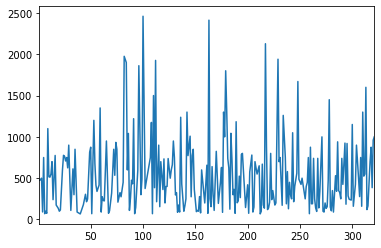

In [25]:
Hitters['Salary'].plot()

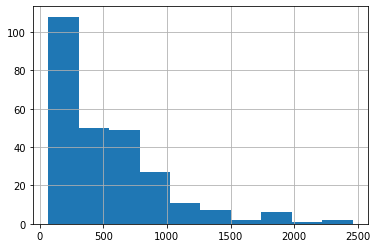

In [30]:
Hitters.Salary.hist()

In [31]:
# 로그 변환을 해서 값을 좀 펴주고 정규변환하게 해주는 것
Hitters.Salary = np.log(Hitters.Salary)

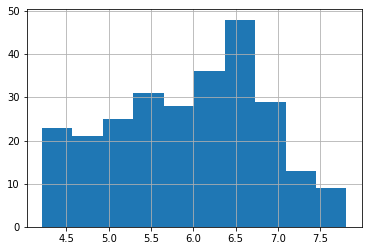

In [33]:
Hitters.Salary.hist()

In [34]:
Hitters.dropna(inplace=True)
# index 순서를 다시 부여해주는것 중간에 빈걸 처리하기 위해서
Hitters.reset_index(drop=True)
Hitters.head(3)

,Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,6.163315,N
2,Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,6.173786,A
3,Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,6.214608,N


In [35]:
X = Hitters.loc[:,['Years','Hits']]
y = Hitters.Salary

In [41]:
# 최대 노드수 3개
reg_tree = tree.DecisionTreeRegressor(max_leaf_nodes=3)

reg_tree.fit(X,y)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=3, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [ ]:
# 현재는 decision tree 에서는 어떠한 변수가 중요한 변수있냐정도만 확인함
# 변수를 재 가공하는데 씀, 변수의 기준과 중요도를 알려주는 것의 용도정도까지만 씀
# 하지만 그마저도 잘 쓰지 않음(Random )

Text(13, 180, 'R3')

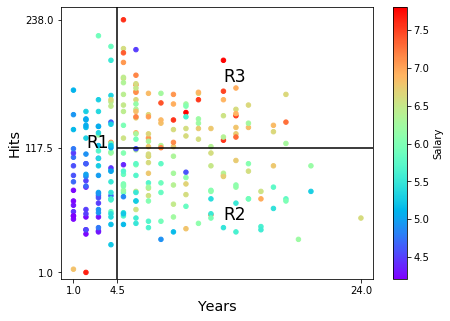

In [50]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))          

Hitters.plot('Years','Hits', kind='scatter',c = 'Salary',
             ax=ax1, xticks=[1, 4.5, 24], yticks=[1, 117.5, 238], 
             xlim=[0, 25], ylim=[-5, 250], cmap='rainbow') 

plt.xlabel('Years', fontsize='x-large')
plt.ylabel('Hits', fontsize='x-large')
plt.vlines(4.5,  ymin=-5, ymax=250)
plt.hlines(117.5, xmin=4.5, xmax=25)
plt.annotate('R1', xy=(2,117.5), fontsize=17)
plt.annotate('R2', xy=(13,50), fontsize=17)
plt.annotate('R3', xy=(13,180), fontsize=17)

In [63]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

from sklearn.model_selection import cross_val_score

# graphviz => python 기반이 아직 아님, 시각화 하는거

In [47]:
import os

In [48]:
# pydotplus 의 기능이 graphviz로 인해서 안될경우를 대비하여 구글에서 설치하고
# 그것을 그 위치를 환경변수에 집어 넣어주는 방법이다
# 한번만 할 것
# os.pathsep == ';'
os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

In [55]:
os.environ['PATH']

'C:\\dev\\Anaconda3;C:\\dev\\Anaconda3\\Library\\mingw-w64\\bin;C:\\dev\\Anaconda3\\Library\\usr\\bin;C:\\dev\\Anaconda3\\Library\\bin;C:\\dev\\Anaconda3\\Scripts;C:\\dev\\Anaconda3\\bin;C:\\dev\\Anaconda3\\condabin;C:\\dev\\Anaconda3;C:\\dev\\Anaconda3\\Library\\mingw-w64\\bin;C:\\dev\\Anaconda3\\Library\\usr\\bin;C:\\dev\\Anaconda3\\Library\\bin;C:\\dev\\Anaconda3\\Scripts;C:\\Program Files (x86)\\Common Files\\Oracle\\Java\\javapath;C:\\windows\\system32;C:\\windows;C:\\windows\\System32\\Wbem;C:\\windows\\System32\\WindowsPowerShell\\v1.0;C:\\windows\\System32\\OpenSSH;C:\\Program Files\\Git\\cmd;C:\\dev\\Anaconda3;C:\\dev\\Anaconda3\\Library\\mingw-w64\\bin;C:\\dev\\Anaconda3\\Library\\usr\\bin;C:\\dev\\Anaconda3\\Library\\bin;C:\\dev\\Anaconda3\\Scripts;C:\\Users\\1-3\\AppData\\Local\\Microsoft\\WindowsApps;C:/Program Files (x86)/Graphviz2.38/bin'

In [ ]:
# 설치시에 anaconda3 navi에 값찾아서 해결함

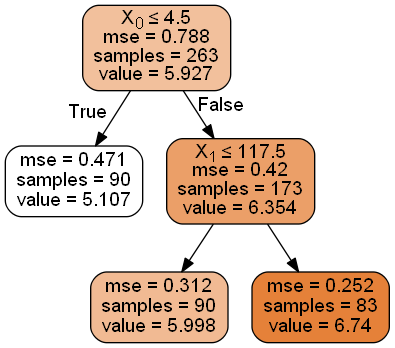

In [51]:
dot_data = StringIO()

export_graphviz(reg_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
# mse : Mean Squared Error, 편차의 제곱값에 대한 평균값
# samples : 해당 노드에 속함 샘플 갯수
# value = 정답과 예측값의 MSE

In [57]:
# Hitters dummy encoding & 'Name' columns 제거, Factor를 숫자로 변경해준것
Hitters_enc = pd.get_dummies(Hitters.drop('Name',axis=1), drop_first = True)

X = Hitters_enc.drop('Salary', axis=1)
y = Hitters_enc.Salary

reg_tree = tree.DecisionTreeRegressor(max_leaf_nodes=12)
reg_tree.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=12, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [60]:
Hitters_enc.head(3)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,6.163315,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,6.173786,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,6.214608,1,0,1


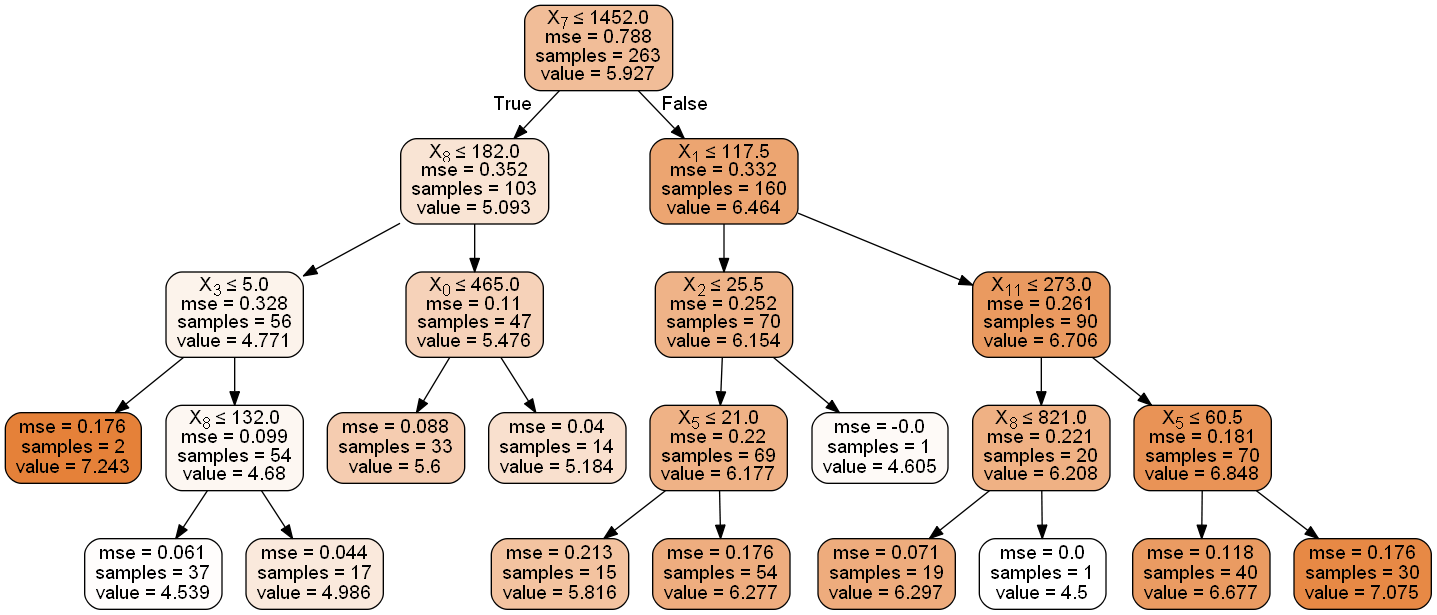

In [58]:
dot_data = StringIO()

export_graphviz(reg_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [61]:
reg_tree.tree_.threshold

array([1452. ,  182. ,  117.5,    5. ,  465. ,   -2. ,  132. ,   25.5,
        273. ,  821. ,   60.5,   -2. ,   -2. ,   -2. ,   -2. ,   21. ,
         -2. ,   -2. ,   -2. ,   -2. ,   -2. ,   -2. ,   -2. ])

In [ ]:
from sklearn.model_selection import cross_val_score

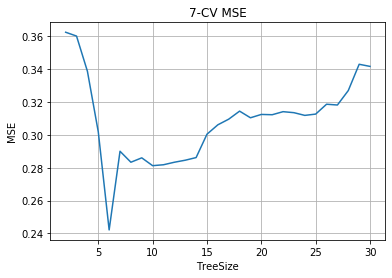

In [65]:
# neg_mean_squared_error 값 리턴이 -로 리턴하기 떄문에 -값을 준다.

tree_size = range(2,31)

MSE_scores=[]

for size in tree_size :
    reg_tree = tree.DecisionTreeRegressor(max_leaf_nodes=size, random_state=123)
    MSE_s = -cross_val_score(reg_tree,X,y, cv=7, scoring='neg_mean_squared_error')
    MSE_scores.append(np.mean(MSE_s))

plt.plot(tree_size, MSE_scores)
plt.title('7-CV MSE')
plt.xlabel('TreeSize')
plt.ylabel('MSE')
plt.grid(True)

In [66]:
reg_tree_best = tree.DecisionTreeRegressor(max_leaf_nodes=6, random_state=1234)
reg_tree_best.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=6, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1234, splitter='best')

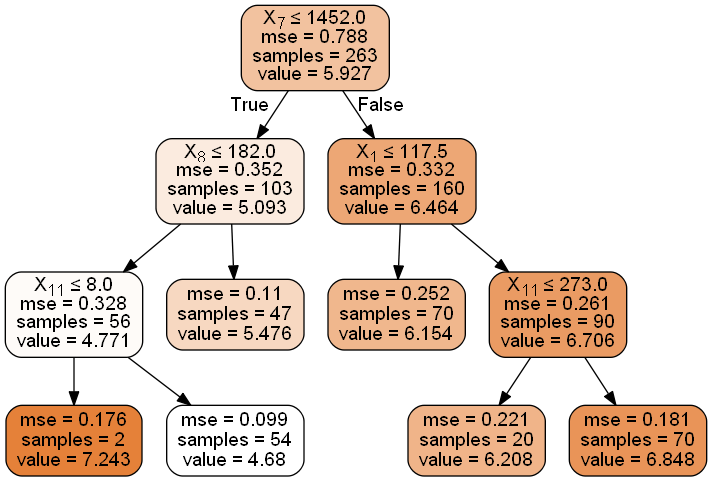

In [67]:
# best 트리 확인
dot_data = StringIO()

export_graphviz(reg_tree_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [71]:
feature_importance = pd.DataFrame({'feature':X.columns, 'importance':reg_tree_best.feature_importances_})

feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
7,CAtBat,0.729415
11,CRBI,0.117926
8,CHits,0.078575
1,Hits,0.074083
0,AtBat,0.000000
17,Division_W,0.000000
16,League_N,0.000000
15,Errors,0.000000
14,Assists,0.000000
13,PutOuts,0.000000


In [81]:
path = 'Carseats.csv'

Carseats = pd.read_csv(path)
print(Carseats.shape)
Carseats.head(2)

(400, 12)


,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes


In [82]:
del Carseats[Carseats.columns[0]]

In [76]:
print(Carseats.shape)
Carseats.head(2)

(400, 11)


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes


In [83]:
Carseats['High'] = Carseats['Sales'].apply(lambda x : 1 if x>8 else 0)
Carseats['Urban'] = Carseats['Urban'].apply(lambda x : 1 if x=='Yes' else 0)
Carseats['US'] = Carseats['US'].apply(lambda x : 1 if x=='Yes' else 0)

In [86]:
Carseats['ShelveLoc'] = pd.factorize(Carseats['ShelveLoc'])[0]

In [87]:
print(Carseats.shape)
Carseats.head(2)

(400, 12)


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1


In [88]:
X = Carseats.drop(['Sales','High'], axis=1)
y = Carseats['High']

clf_tree = tree.DecisionTreeClassifier(max_leaf_nodes=15)
clf_tree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=15,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [90]:
clf_tree.tree_.threshold

array([ 92.5,   0.5,   6.5, 144.5,   0.5,  -2. ,   1.5, 163.5, 124.5,
       121.5,  22. , 102.5,  -2. ,  -2. , 151.5,  58. ,  -2. ,  -2. ,
        -2. ,   0.5,  -2. ,  -2. ,  -2. ,  -2. ,  -2. ,  -2. ,  -2. ,
        -2. ,  -2. ])

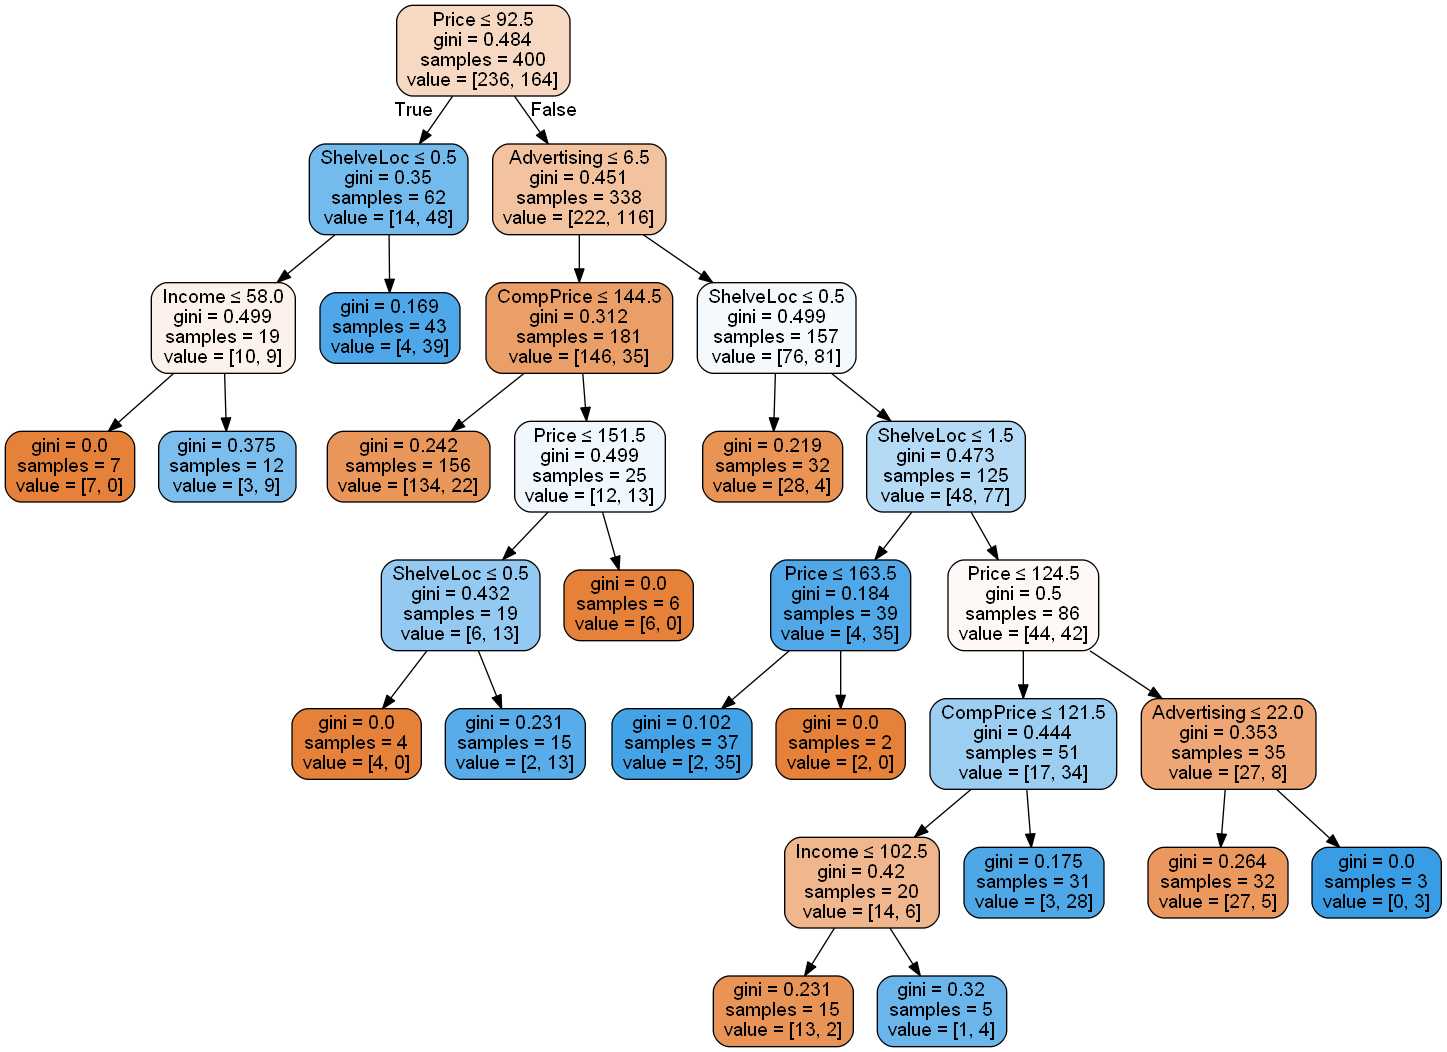

In [92]:
dot_data = StringIO()

export_graphviz(clf_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)
# 컬럼이 매핑이 안되있는 경우에는 직접 쳐야됨
# ['Price','....']


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1234)

clf_tree = tree.DecisionTreeClassifier(max_leaf_nodes=15)
clf_tree.fit(X_train, y_train)

y_pred = clf_tree.predict(X_test)
accuracy_score(y_test,y_pred)

0.7833333333333333

leaf : 2 , accuracy score :  0.5083333333333333 , MSE_score :  0.41070758509782895
leaf : 3 , accuracy score :  0.7 , MSE_score :  0.38587733404806573
leaf : 4 , accuracy score :  0.6416666666666667 , MSE_score :  0.3574845885821496
leaf : 5 , accuracy score :  0.6416666666666667 , MSE_score :  0.3359644420620031
leaf : 6 , accuracy score :  0.7166666666666667 , MSE_score :  0.3073840793352988
leaf : 7 , accuracy score :  0.8166666666666667 , MSE_score :  0.3108683998927901
leaf : 8 , accuracy score :  0.8 , MSE_score :  0.30032833020637895
leaf : 9 , accuracy score :  0.8083333333333333 , MSE_score :  0.2970182256767622
leaf : 10 , accuracy score :  0.7833333333333333 , MSE_score :  0.30031939605110336
leaf : 11 , accuracy score :  0.7833333333333333 , MSE_score :  0.3039779326364692
leaf : 12 , accuracy score :  0.7916666666666666 , MSE_score :  0.30023228803716606
leaf : 13 , accuracy score :  0.7916666666666666 , MSE_score :  0.25406504065040647
leaf : 14 , accuracy score :  0.7583

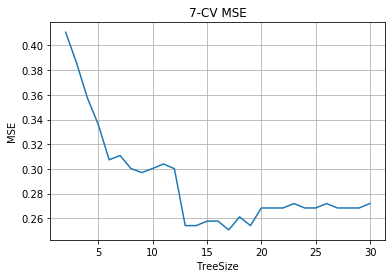

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1234)

tree_size = range(2,31)
MSE_scores=[]

for size in tree_size :
    clf_tree_test = tree.DecisionTreeClassifier(max_leaf_nodes=size, random_state=123)
    clf_tree_test.fit(X_train, y_train)
    
    y_pred = clf_tree_test.predict(X_test)
    
    MSE_s = 1 - cross_val_score(clf_tree_test,X_train,y_train, cv=7, scoring='accuracy')
    MSE_scores.append(np.mean(MSE_s))
    print('leaf : {}'.format(size),', accuracy score : ', accuracy_score(y_test,y_pred), ', MSE_score : ', MSE_s.mean())

plt.plot(tree_size, MSE_scores)
plt.title('MSE')
plt.xlabel('TreeSize')
plt.ylabel('MSE')
plt.grid(True)

In [103]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1234)

RF_clf = RandomForestClassifier(n_estimators=500, max_features=6, random_state=1234)
RF_clf.fit(X_train, y_train)

y_pred = RF_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8833333333333333

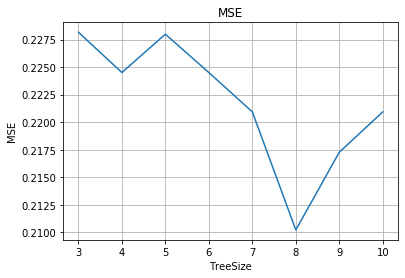

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1234)

feature_size = range(3,11)
MSE_scores = []

for feature in feature_size :
    RF_clf = RandomForestClassifier(n_estimators=500, max_features=feature, random_state=1234)
    MSE_s = 1 - cross_val_score(RF_clf,X_train,y_train, cv=7, scoring='accuracy', n_jobs=-1)
    MSE_scores.append(np.mean(MSE_s))

plt.plot(feature_size, MSE_scores)
plt.title('MSE')
plt.xlabel('TreeSize')
plt.ylabel('MSE')
plt.grid(True)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1234)

RF_clf = RandomForestClassifier(n_estimators=500, max_features=8, random_state=1234)
RF_clf.fit(X_train, y_train)

y_pred = RF_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8666666666666667

In [ ]:
# 안정적인것을 기대하는거지 기대한 값이 최상의 값을 얻는것은 아니다. 
# 오히려 떨엊ㄴ 것에 대해서

In [116]:
feature_importance = pd.DataFrame({'feature':X_train.columns, 'importance':RF_clf.feature_importances_})

feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
4,Price,0.219666
5,ShelveLoc,0.151105
6,Age,0.139221
2,Advertising,0.131259
0,CompPrice,0.120851
1,Income,0.104727
3,Population,0.067410
7,Education,0.044821
9,US,0.011570
8,Urban,0.009371
